**CATARACT DETECTION**

In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
#from tensorflow.keras.optimizers.experimental import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.applications import VGG16, InceptionV3

# EXPLORATORY DATA ANALYSIS

In [3]:
# Define the path to the train directory containing separate folders for each category
train_dir = './train/'

# Initialize a dictionary to store the image count for each category
image_counts = {}

# Loop through each subfolder in the train directory
for subfolder in os.listdir(train_dir):
    subfolder_path = os.path.join(train_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Get a list of image files in the current subfolder
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        # Store the count of images in the dictionary
        image_counts[subfolder] = len(image_files)

# Display the number of images in each subfolder
for category, count in image_counts.items():
    print(f"Number of images in '{category}' category: {count}")

# Display the total number of images
total_images = sum(image_counts.values())
print(f"Total number of images: {total_images}")


Number of images in 'cataract' category: 245
Number of images in 'normal' category: 246
Total number of images: 491



Displaying sample images for 'cataract' category:


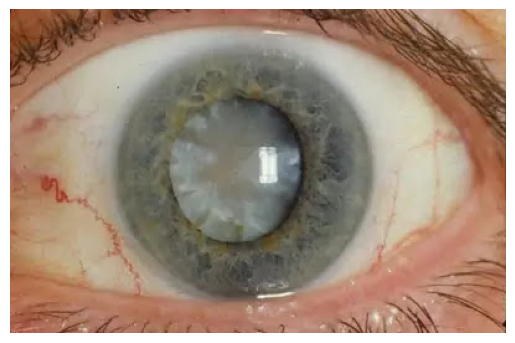

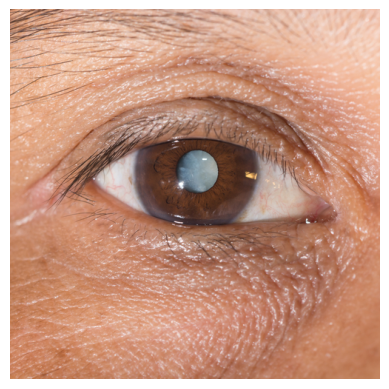

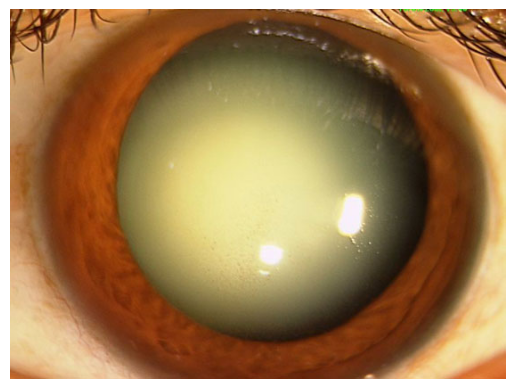

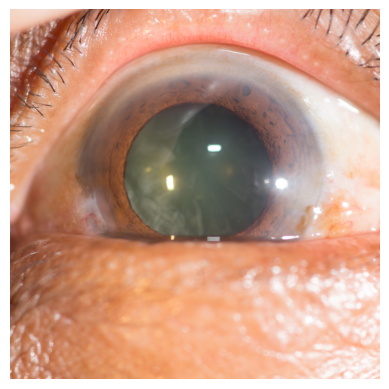

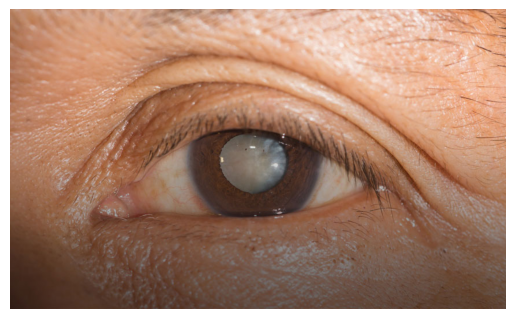


Displaying sample images for 'normal' category:


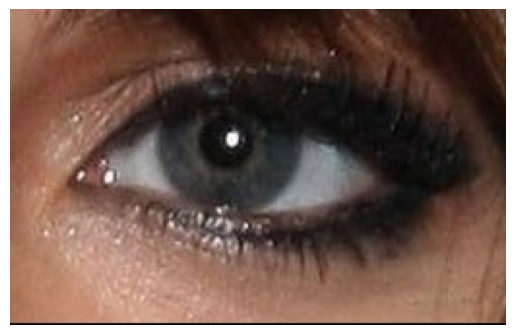

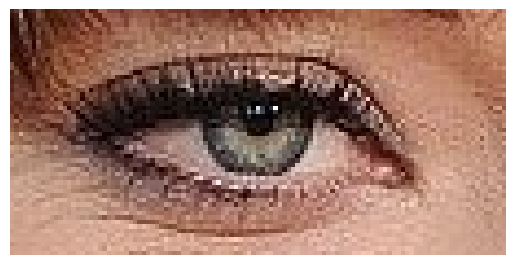

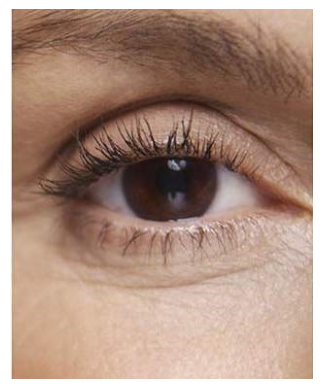

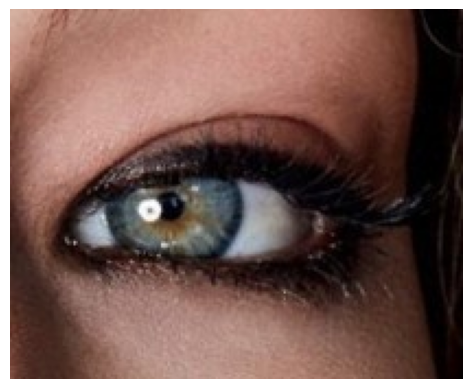

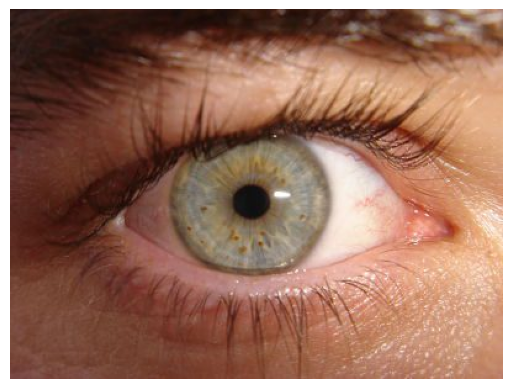

In [12]:
# Define categories
categories = ['cataract', 'normal']

# Display a few sample images from each category
for category in categories:
    category_path = os.path.join(train_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"\nDisplaying sample images for '{category}' category:")
    sample_images = random.sample(image_files, min(5, len(image_files)))
    
    for img_file in sample_images:
        img_path = os.path.join(category_path, img_file)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [25]:
# Convert the image counts dictionary to a DataFrame
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Category', 'Image_Count'])

# Display descriptive statistics for the image counts
print("Descriptive Statistics for Image Counts by Category:")
print(df_counts['Image_Count'].describe())

Descriptive Statistics for Image Counts by Category:
count      2.000000
mean     245.500000
std        0.707107
min      245.000000
25%      245.250000
50%      245.500000
75%      245.750000
max      246.000000
Name: Image_Count, dtype: float64


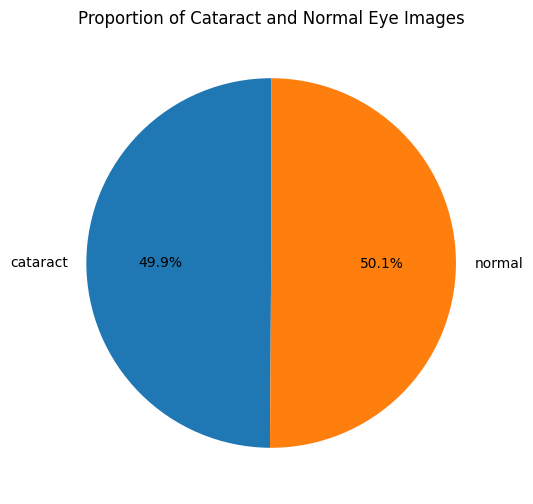

In [26]:
# Create a pie chart for the proportions of each category
plt.figure(figsize=(6, 6))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Cataract and Normal Eye Images')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()

## IMAGE DIMENSIONS AND CHANNELS

In [7]:
# Dictionary to store dimensions for each category
dimensions = {}

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    category_dimensions = []
    
    for img_file in image_files[:100]:  # Limiting to 100 images per category
        img_path = os.path.join(category_path, img_file)
        img = Image.open(img_path)
        category_dimensions.append(img.size)  # (width, height)
    
    # Convert to numpy array for statistical analysis
    dimensions[category] = np.array(category_dimensions)

# Display average dimensions and unique dimensions per category
for category, dims in dimensions.items():
    print(f"\n{category.capitalize()} - Average dimensions (width x height): {dims.mean(axis=0)}")
    print(f"{category.capitalize()} - Unique dimensions: {np.unique(dims, axis=0, return_counts=True)}")


Cataract - Average dimensions (width x height): [787.89 515.71]
Cataract - Unique dimensions: (array([[ 154,  115],
       [ 165,  116],
       [ 200,  136],
       [ 200,  177],
       [ 241,  183],
       [ 246,  179],
       [ 250,  167],
       [ 250,  175],
       [ 258,  177],
       [ 269,  241],
       [ 271,  186],
       [ 300,  218],
       [ 320,  213],
       [ 321,  307],
       [ 340,  288],
       [ 352,  231],
       [ 356,  179],
       [ 400,  224],
       [ 400,  250],
       [ 400,  260],
       [ 400,  267],
       [ 400,  400],
       [ 461,  285],
       [ 493,  335],
       [ 500,  309],
       [ 508,  338],
       [ 510,  340],
       [ 512,  512],
       [ 520,  375],
       [ 557,  415],
       [ 564,  404],
       [ 594,  308],
       [ 597,  313],
       [ 600,  390],
       [ 600,  391],
       [ 611,  305],
       [ 615,  409],
       [ 640,  478],
       [ 640,  640],
       [ 642,  403],
       [ 646,  431],
       [ 650,  221],
       [ 682,  392],
 

## PIXEL INTENSITY DISTRIBUTION

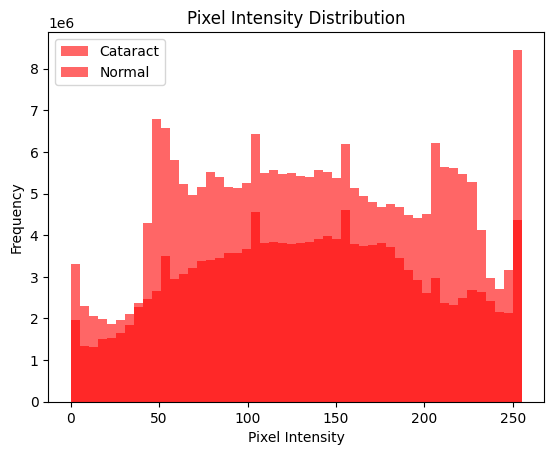

In [10]:
# Dictionary to store pixel values for each category
pixel_values = {}

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    category_pixel_values = []
    
    for img_file in image_files[:100]:  # Limiting to 100 images for efficiency
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            category_pixel_values.append(img.flatten())
    
    pixel_values[category] = np.concatenate(category_pixel_values)

# Plot the pixel intensity distribution for each category
for category, values in pixel_values.items():
    plt.hist(values, bins=50, color='red', alpha=0.6, label=category.capitalize())
    
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

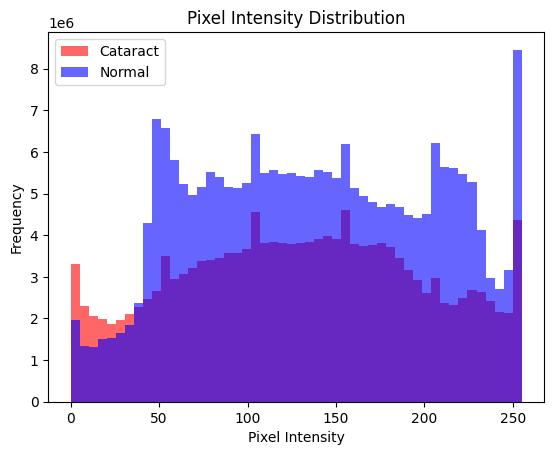

In [14]:
pixel_values = {}

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    category_pixel_values = []
    
    for img_file in image_files[:100]:  # Limiting to 100 images for efficiency
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            category_pixel_values.append(img.flatten())
    
    pixel_values[category] = np.concatenate(category_pixel_values)

# Plot the pixel intensity distribution for each category with specified colors
colors = {'normal': 'blue', 'cataract': 'red'}

for category, values in pixel_values.items():
    plt.hist(values, bins=50, color=colors[category], alpha=0.6, label=category.capitalize())

plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## CORRUPT OR UNREADABLE IMAGES

In [20]:
corrupt_images = {}

for category in categories:
    category_path = os.path.join(train_dir, category)
    corrupt_images[category] = []
    
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Check if image is corrupt
        except (IOError, SyntaxError):
            corrupt_images[category].append(img_file)

# Display corrupt images per category
for category, files in corrupt_images.items():
    print(f"\nNumber of corrupt images in '{category}' category: {len(files)}")
    if files:
        print(f"List of corrupt images in '{category}' category: {files}")



Number of corrupt images in 'cataract' category: 0

Number of corrupt images in 'normal' category: 0


## NORMALIZATION AND RESIZING TRAINING AND TESTING DATASETS

In [ ]:
# Define base paths to the training and testing dataset folders
base_dir_train = './train'
base_dir_test = './test'
categories = ['cataract', 'normal']  # Only Cataract and Normal categories

# Define image size
img_size = (224, 224)

# Function to normalize and resize images, then remove the original
def normalize_and_resize_images(category_dir):
    print(f"Processing category: {category_dir.split('/')[-1]}")
    
    # List all images in the category directory
    image_files = os.listdir(category_dir)
    initial_image_count = len(image_files)

    for img_name in image_files:
        img_path = os.path.join(category_dir, img_name)
        
        try:
            # Load and preprocess the image
            img = Image.open(img_path)
            img = img.convert('RGB')  # Ensure 3-channel image (RGB)
            img = img.resize(img_size)  # Resize image to the defined size
            
            # Convert the image to a NumPy array and normalize pixel values to [0, 1] range
            img_array = img_to_array(img)
            img_array /= 255.0

            # Save the normalized and resized image
            normalized_img_name = f"{os.path.splitext(img_name)[0]}_normalized.jpg"
            img.save(os.path.join(category_dir, normalized_img_name))
            
            # Remove the original unprocessed image
            os.remove(img_path)
        
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")
    
    # Count the images after processing
    final_image_count = len(os.listdir(category_dir))
    print(f"Category: {category_dir.split('/')[-1]} - Images before: {initial_image_count}, Images after: {final_image_count}")

# Process both training and testing sets
for base_dir in [base_dir_train, base_dir_test]:
    for category in categories:
        category_dir = os.path.join(base_dir, category)
        normalize_and_resize_images(category_dir)

print("\nNormalization and resizing completed for both training and testing datasets.")


Processing category: train\cataract
Category: train\cataract - Images before: 245, Images after: 245
Processing category: train\normal
Category: train\normal - Images before: 246, Images after: 246
Processing category: test\cataract
Category: test\cataract - Images before: 61, Images after: 61
Processing category: test\normal
Category: test\normal - Images before: 60, Images after: 60

Normalization and resizing completed for both training and testing datasets.


## DATA AUGMENTATION ON TRAINING IMAGES


Processing category: ./train\cataract
Initial number of images: 245
Category: train\cataract - Images before: 245, Images after: 1470

Processing category: ./train\normal
Initial number of images: 246
Category: train\normal - Images before: 246, Images after: 1476

Augmentation and noisy variation completed. Images saved in respective folders.


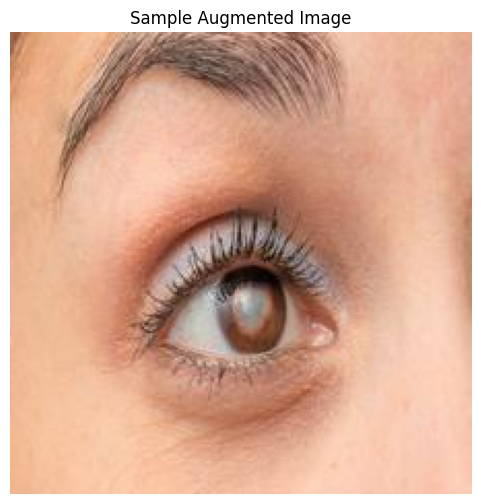

In [31]:
# Define paths to the training dataset folder
base_dir = './train'
# categories = ['cataract', 'normal']  # Updated categories

# Define image size
img_size = (224, 224)

# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,               # Rotation of up to 15 degrees
    width_shift_range=0.05,          # Width shift of up to 5%
    height_shift_range=0.05,         # Height shift of up to 5%
    zoom_range=0.1,                  # Zoom up to 10%
    horizontal_flip=True,            # Horizontal flip
    vertical_flip=False,             # Vertical flip disabled     
    fill_mode='nearest'              # 'nearest' mode to avoid black borders
)

# Function to add noise to an image
def add_noise(image_array, noise_factor=0.05):
    noise = np.random.randn(*image_array.shape) * noise_factor
    noisy_image = image_array + noise
    noisy_image = np.clip(noisy_image, 0.0, 1.0)  # Ensure pixel values stay in [0, 1]
    return noisy_image

# Function to augment images with noisy variations and save them in respective folders
def augment_and_save_images(category_dir, num_variations=3):
    # List all images in the category directory
    image_files = os.listdir(category_dir)
    
    initial_image_count = len(image_files)
    print(f"\nProcessing category: {category_dir}")
    print(f"Initial number of images: {initial_image_count}")
    
    # Process each image in the category directory
    for img_name in image_files:
        img_path = os.path.join(category_dir, img_name)

        try:
            # Load and preprocess the image
            img = Image.open(img_path)
            img = img.convert('RGB')  # Ensure 3-channel image (RGB)
            img = img.resize(img_size)  # Resize image to (224, 224)
            
            # Convert the image to a NumPy array
            img_array = img_to_array(img)
            img_array /= 255.0  # Normalize the image pixel values to [0, 1] range

            # Save the original image with a new name (no changes to original images)
            original_img_name = f"{os.path.splitext(img_name)[0]}_augmented.jpg"
            img.save(os.path.join(category_dir, original_img_name))

            # Perform augmentation
            for i in range(num_variations):
                augmented_img_array = datagen.random_transform(img_array)
                
                # Convert the augmented array back to an image
                augmented_img = Image.fromarray((augmented_img_array * 255).astype(np.uint8))
                
                # Save the augmented image
                new_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i+1}.jpg"
                augmented_img.save(os.path.join(category_dir, new_img_name))

            # Apply noisy variation
            noisy_img_array = add_noise(img_array)
            noisy_img = Image.fromarray((noisy_img_array * 255).astype(np.uint8))

            # Save noisy image
            noisy_img_name = f"{os.path.splitext(img_name)[0]}_noisy.jpg"
            noisy_img.save(os.path.join(category_dir, noisy_img_name))

        except Exception as e:
            print(f"Error processing image {img_name}: {e}")

    # Count the images after augmentation
    final_image_count = len(os.listdir(category_dir))
    print(f"Category: {category_dir.split('/')[-1]} - Images before: {initial_image_count}, Images after: {final_image_count}")

# Perform augmentation and noisy variation for each category and save images
for category in categories:
    category_dir = os.path.join(base_dir, category)
    augment_and_save_images(category_dir, num_variations=3)

print("\nAugmentation and noisy variation completed. Images saved in respective folders.")

# Display one sample image after augmentation and noisy variation
def display_sample_image(category_dir):
    # List all images in the category directory
    image_files = os.listdir(category_dir)
    
    # Load and display one sample image (the first image after augmentation)
    img_path = os.path.join(category_dir, image_files[0])  # Change the index if you want a different image
    img = Image.open(img_path)
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title("Sample Augmented Image")
    plt.axis('off')
    plt.show()

# Show a sample image from one category (for example, 'Cataract')
category_dir = os.path.join(base_dir, 'cataract')
display_sample_image(category_dir)


In [33]:
# Define the path to the main train directory with subfolders
train_dir = './train'

# Loop through each subfolder (category) in the train directory
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    
    if os.path.isdir(category_path):  # Check if it is a folder
        # Count the number of images in the subfolder
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        num_images = len(image_files)
        
        # Print the count of images in the current category
        print(f"Category: {category} - Number of images after augmentation: {num_images}")

Category: cataract - Number of images after augmentation: 1470
Category: normal - Number of images after augmentation: 1476


In [ ]:
test_dir = './test'
# Loop through each subfolder (category) in the train directory
for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    
    if os.path.isdir(category_path):  # Check if it is a folder
        # Count the number of images in the subfolder
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        num_images = len(image_files)
        
        # Print the count of images in the current category
        print(f"Category: {category} - Number of images in the Testing Folder: {num_images}")

Category: cataract - Number of images in the Testing Folder: 61
Category: normal - Number of images in the Testing Folder: 60


In [39]:
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through both train and test directories
for main_dir in ['./train', './test']:
    for dirname, _, filenames in os.walk(main_dir):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            # Match subfolder names, ensuring system-independent path handling
            if "cataract" in dirname.lower() and "train" in dirname.lower():
                image_paths["train_cataract"].append(path)
            elif "normal" in dirname.lower() and "train" in dirname.lower():
                image_paths["train_normal"].append(path)
            elif "cataract" in dirname.lower() and "test" in dirname.lower():
                image_paths["test_cataract"].append(path)
            elif "normal" in dirname.lower() and "test" in dirname.lower():
                image_paths["test_normal"].append(path)

# Print the number of images in each category for verification
for category, paths in image_paths.items():
    print(f"{category}: {len(paths)} images")

train_cataract: 1470 images
train_normal: 1476 images
test_cataract: 61 images
test_normal: 60 images


In [40]:
len(image_paths["train_normal"])

1476

In [41]:
len(image_paths["test_normal"])

60

**Normal sample image**

size of image : (224, 224, 3)


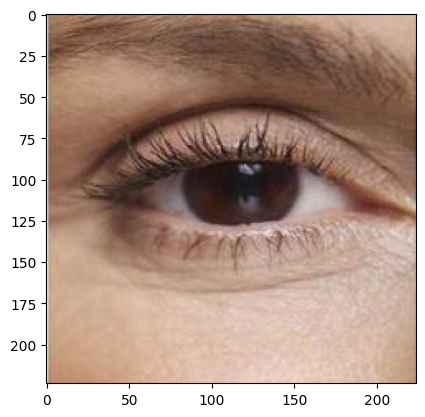

In [42]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

**Cataract sample image**

size of image : (224, 224, 3)


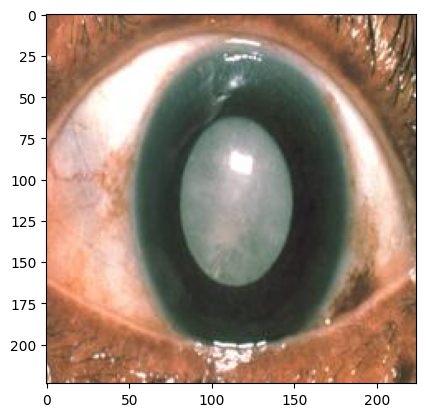

In [43]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [44]:
training_dir = "./train/"
image_size = (55, 94, 3)
target_size = (55, 94)

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 2946 images belonging to 2 classes.
